In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
file=files.upload()

Saving US Superstore Office.csv to US Superstore Office.csv


In [ ]:
offi=pd.read_csv('US Superstore Office.csv')
print(offi)

      Row ID        Order ID  Order Date  ... Quantity Discount   Profit
0          1  CA-2016-138688   6/12/2016  ...        2      0.0   6.8714
1          2  US-2015-108966  10/11/2015  ...        2      0.2   2.5164
2          3  CA-2014-115812    6/9/2014  ...        4      0.0   1.9656
3          4  CA-2014-115812    6/9/2014  ...        3      0.2   5.7825
4          5  CA-2014-115812    6/9/2014  ...        5      0.0  34.4700
...      ...             ...         ...  ...      ...      ...      ...
6021    6022  US-2016-157728   9/22/2016  ...        7      0.0  16.7132
6022    6023  CA-2015-100251   5/17/2015  ...       10      0.0  15.1200
6023    6024  CA-2015-100251   5/17/2015  ...        4      0.0  16.1240
6024    6025  CA-2017-121258   2/26/2017  ...        4      0.0  13.3200
6025    6026  CA-2017-119914    5/4/2017  ...        2      0.0  72.9480

[6026 rows x 20 columns]


In [ ]:
X = offi.iloc[:, [16, 19]].values
print(X)

[[ 14.62     6.8714]
 [ 22.368    2.5164]
 [  7.28     1.9656]
 ...
 [ 55.6     16.124 ]
 [ 29.6     13.32  ]
 [243.16    72.948 ]]


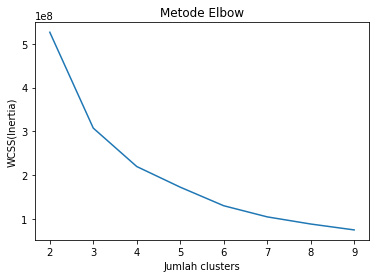

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) 
plt.plot(range(2, 10), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS(Inertia)')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

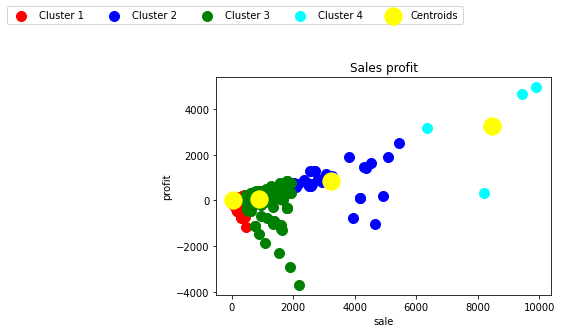

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Sales profit')
plt.xlabel('sale')
plt.ylabel('profit')
plt.legend(bbox_to_anchor =(0.75, 1.35), ncol = 6)

plt.show()